### **Hello, this is Salma's jupyter notebook about the Australian Football League!**

Each observation/row is the player’s statistics for one game of Australian Football League (AFL). Every AFL regular home & away game and finals series game in the relevant Seasons is included, currently 2012 – 2016. Pre-Season, Reserves and trial games are not included.

Coming from Egypt where everyone either plays or watches football, this dataset was interesting to me. I felt that weekly information about the players could provide insight on the teams and players performance over time. 

The dataset was loaded and below is an small subset of the  downloaded csv file. 

In [1]:
#intro into visualization
import pandas as pd
afl = pd.read_csv("aflstats/stats.csv")
afl.head()

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,...,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
0,Adelaide,"Atkins, Rory",1994-07-12,186,85,Midfield,2018,R1,2018-03-23,87.0,...,0,0,4,9,0,0,0,0,1,86
1,Adelaide,"Betts, Eddie",1986-11-26,174,74,Forward,2018,R1,2018-03-23,87.0,...,0,0,6,9,0,1,3,0,1,85
2,Adelaide,"Brown, Luke",1992-09-22,181,81,Defender,2018,R1,2018-03-23,87.0,...,0,0,1,10,0,0,2,0,0,82
3,Adelaide,"Crouch, Matt",1995-04-21,182,80,Midfield,2018,R1,2018-03-23,87.0,...,1,0,11,31,0,0,0,0,1,80
4,Adelaide,"Doedee, Tom",1997-03-01,188,88,Defender,2018,R1,2018-03-23,87.0,...,0,0,8,14,0,0,9,1,0,93


The data types of each column are listed below. 

In [2]:
afl.dtypes

Team                       object
Player                     object
D.O.B                      object
Height                      int64
Weight                      int64
Position                   object
Season                      int64
Round                      object
Date                       object
Score                     float64
Margin                    float64
WinLoss                    object
Opposition                 object
Venue                      object
Disposals                   int64
Kicks                       int64
Marks                       int64
Handballs                   int64
Goals                       int64
Behinds                     int64
Hitouts                     int64
Tackles                     int64
Rebound50s                  int64
Inside50s                   int64
Clearances                  int64
Clangers                    int64
FreesFor                    int64
FreesAgainst                int64
BrownlowVotes               int64
ContendedPosse

The column named D.O.B which referred to date of birth was not very useful, a new column named Age was inserted using the D.O.B information. The few steps can be seen below.

In [3]:
afl["DOB"] = afl["D.O.B"] #renamed the date of birth column to DOB to make functions easier 

In [4]:
afl.head()

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,...,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed,DOB
0,Adelaide,"Atkins, Rory",1994-07-12,186,85,Midfield,2018,R1,2018-03-23,87.0,...,0,4,9,0,0,0,0,1,86,1994-07-12
1,Adelaide,"Betts, Eddie",1986-11-26,174,74,Forward,2018,R1,2018-03-23,87.0,...,0,6,9,0,1,3,0,1,85,1986-11-26
2,Adelaide,"Brown, Luke",1992-09-22,181,81,Defender,2018,R1,2018-03-23,87.0,...,0,1,10,0,0,2,0,0,82,1992-09-22
3,Adelaide,"Crouch, Matt",1995-04-21,182,80,Midfield,2018,R1,2018-03-23,87.0,...,0,11,31,0,0,0,0,1,80,1995-04-21
4,Adelaide,"Doedee, Tom",1997-03-01,188,88,Defender,2018,R1,2018-03-23,87.0,...,0,8,14,0,0,9,1,0,93,1997-03-01


In [5]:
afl["DOB"] = pd.to_datetime(afl.DOB, errors="coerce") #converting to date time 

In [6]:
afl.shape

(63712, 38)

In [7]:
import datetime as DT
import numpy as np
import io

In [8]:
now = pd.Timestamp('now')
now

Timestamp('2019-06-05 17:39:23.840741')

In [9]:
afl['DOB'] = afl['DOB'].where(afl['DOB'] < now, afl['DOB'] -  np.timedelta64(100, 'Y'))

In [10]:
afl['Age'] = (now - afl['DOB']).astype('<m8[Y]')   

Since the dataset was weekly infomation about most of the players, I decided to seperate the database into two seperate data frames. The first dataframe is called Players and stores the unique team name, player name, age, height, weight, and position.

In [11]:
players= afl[["Team", "Player", "Age", "Height", "Weight", "Position"]]
players.head() #remove duplicates

,Team,Player,Age,Height,Weight,Position
0,Adelaide,"Atkins, Rory",24.0,186,85,Midfield
1,Adelaide,"Betts, Eddie",32.0,174,74,Forward
2,Adelaide,"Brown, Luke",26.0,181,81,Defender
3,Adelaide,"Crouch, Matt",24.0,182,80,Midfield
4,Adelaide,"Doedee, Tom",22.0,188,88,Defender


In [12]:
players['unique_model'] = players.Player.str.cat(
    [players.Team, players.Age.apply(str)],sep='-')

/Users/sdessouki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
players[["Player", "Team", "Age", "unique_model"]].head()

,Player,Team,Age,unique_model
0,"Atkins, Rory",Adelaide,24.0,"Atkins, Rory-Adelaide-24.0"
1,"Betts, Eddie",Adelaide,32.0,"Betts, Eddie-Adelaide-32.0"
2,"Brown, Luke",Adelaide,26.0,"Brown, Luke-Adelaide-26.0"
3,"Crouch, Matt",Adelaide,24.0,"Crouch, Matt-Adelaide-24.0"
4,"Doedee, Tom",Adelaide,22.0,"Doedee, Tom-Adelaide-22.0"


In [14]:
players.unique_model.value_counts()

Breust, Luke-Hawthorn-28.0                    168
Kennedy, Josh P-Sydney-30.0                   166
Smith, Isaac-Hawthorn-30.0                    165
Grundy, Heath-Sydney-33.0                     165
Burgoyne, Shaun-Hawthorn-36.0                 161
Parker, Luke-Sydney-26.0                      160
Jacobs, Sam-Adelaide-31.0                     160
Atley, Shaun-North Melbourne-26.0             160
Smith, Nick-Sydney-30.0                       159
Ebert, Brad-Port Adelaide-29.0                159
Jack, Kieren-Sydney-31.0                      159
Westhoff, Justin-Port Adelaide-32.0           159
Riewoldt, Jack-Richmond-30.0                  159
Selwood, Joel-Geelong-31.0                    158
Gaff, Andrew-West Coast-26.0                  158
Gunston, Jack-Hawthorn-27.0                   158
Martin, Dustin-Richmond-27.0                  158
Ward, Callan-Greater Western Sydney-29.0      156
Cotchin, Trent-Richmond-29.0                  156
Hannebery, Dan-Sydney-28.0                    156


In [15]:
players[players.unique_model=='Breust, Luke-Hawthorn-28.0'].head()

,Team,Player,Age,Height,Weight,Position,unique_model
4510,Hawthorn,"Breust, Luke",28.0,184,84,Forward,"Breust, Luke-Hawthorn-28.0"
4533,Hawthorn,"Breust, Luke",28.0,184,84,Forward,"Breust, Luke-Hawthorn-28.0"
4555,Hawthorn,"Breust, Luke",28.0,184,84,Forward,"Breust, Luke-Hawthorn-28.0"
4576,Hawthorn,"Breust, Luke",28.0,184,84,Forward,"Breust, Luke-Hawthorn-28.0"
4598,Hawthorn,"Breust, Luke",28.0,184,84,Forward,"Breust, Luke-Hawthorn-28.0"


In [16]:
players.shape

(63712, 7)

In [17]:
players_dropped = players.drop_duplicates()
players_dropped.shape

(1506, 7)

In [18]:
players_dropped.head()
del players_dropped['unique_model']

In [19]:
players_dropped.head()

,Team,Player,Age,Height,Weight,Position
0,Adelaide,"Atkins, Rory",24.0,186,85,Midfield
1,Adelaide,"Betts, Eddie",32.0,174,74,Forward
2,Adelaide,"Brown, Luke",26.0,181,81,Defender
3,Adelaide,"Crouch, Matt",24.0,182,80,Midfield
4,Adelaide,"Doedee, Tom",22.0,188,88,Defender


Another data frame was created that included the player, team, and age which is presumed to be the primary key of the original afl data frame. Then the other columns which had the game statistics for each game were indexed and added to the game_sts dataframe. 

In [20]:
game_cols= ["Player", "Team", "Age"]

In [21]:
game_cols.extend(afl.columns[6:37].to_list())

In [22]:
Season                             int64
Round                             object
Date                              object
Score                            float64
Margin                           float64
WinLoss                           object
Opposition                        object
Venue                             object
Disposals                          int64
Kicks                              int64
Marks                              int64
Handballs                          int64
Goals                              int64
Behinds                            int64
Hitouts                            int64
Tackles                            int64
Rebound50s                         int64
Inside50s                          int64
Clearances                         int64
Clangers                           int64
FreesFor                           int64
FreesAgainst                       int64
BrownlowVotes                      int64
ContendedPossessions               int64
UncontendedPossessions             int64
ContestedMarks                     int64
MarksInside50                      int64
OnePercenters                      int64
Bounces                            int64
GoalAssists                        int64
PercentPlayed                      int64

SyntaxError: invalid syntax (<ipython-input-22-787c145bf21f>, line 1)

In [23]:
game_stats = afl[game_cols]

In [24]:
game_stats.head()

,Player,Team,Age,Season,Round,Date,Score,Margin,WinLoss,Opposition,...,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
0,"Atkins, Rory",Adelaide,24.0,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,...,0,0,4,9,0,0,0,0,1,86
1,"Betts, Eddie",Adelaide,32.0,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,...,0,0,6,9,0,1,3,0,1,85
2,"Brown, Luke",Adelaide,26.0,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,...,0,0,1,10,0,0,2,0,0,82
3,"Crouch, Matt",Adelaide,24.0,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,...,1,0,11,31,0,0,0,0,1,80
4,"Doedee, Tom",Adelaide,22.0,2018,R1,2018-03-23,87.0,-12.0,L,Essendon,...,0,0,8,14,0,0,9,1,0,93


I was confused as to why some teams had a score above 100 since FIFA and other organizations score players out of 100. My suspicion was that there were repeated player names on different teams which were being summed and averaged. To further explore this suspicion I used the describe function to see the max score for each player.

In [25]:
game_stats.Score.describe()

count    63624.000000
mean        88.365837
std         27.656656
min         17.000000
25%         69.000000
50%         86.000000
75%        106.000000
max        193.000000
Name: Score, dtype: float64

As seen above, the result above proves that the sacore is out of 200 and the max score for a player is 193.

Below the data visualization portion of the assignment has begun, now that I have the seperate data bases and I will begin exploring aspects of the data that I find interesting or could be valuable to a coach, player, or fan. 

Using the game statistics player, the average score per player was calculated and a bar chart of the top 10 players were graphed. 

In [77]:
score_by_player = game_stats.groupby("Player",)["Score"].mean()
score_by_player=score_by_player.sort_values(ascending=False).head()

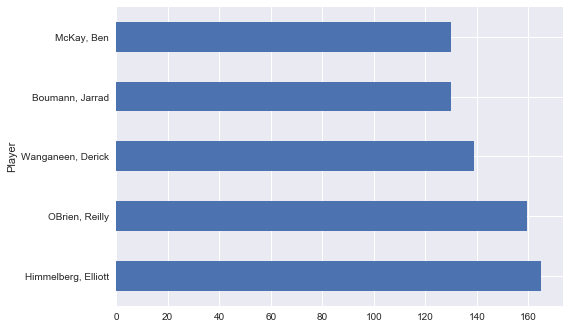

In [78]:
score_by_player.head(10).plot.barh();

In order to see if there was a relationship between a player's score and height, I inner joined the two data frames on the common column of Player. This new data frame was called player_score_height and was sorted to show the players with the highest score first. Matplotlib was imported and a scatter plot was plotted to see if there was a trend. However, I understand that if there was a relationship it would need to be further explored using regression to analyze whether height, weight, position, and possibly percent played all affect score. 

In [131]:
player_score_height = pd.merge(players_dropped, score_by_player, left_on="Player", right_on="Player", how="inner")

In [127]:
player_score_height.sort_values(by= "Score", ascending=False).head()

,Team,Player,Age,Height,Weight,Position,Score
0,Adelaide,"Himmelberg, Elliott",21.0,198,94,Forward,165.0
2,Adelaide,"OBrien, Reilly",23.0,202,101,Ruck,159.5
3,Hawthorn,"Wanganeen, Derick",28.0,174,75,Midfield,139.0
1,North Melbourne,"McKay, Ben",21.0,201,95,Defender,130.0
4,Hawthorn,"Boumann, Jarrad",29.0,196,85,Forward,130.0


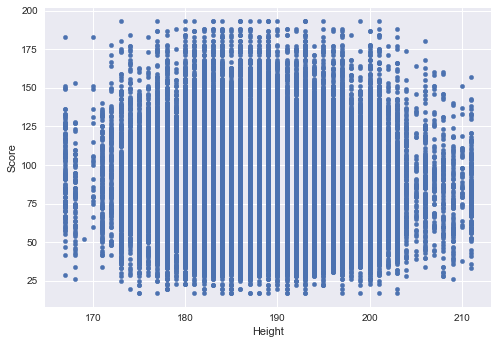

In [82]:
import matplotlib.pyplot as plt
afl.plot.scatter(x="Height", y="Score");

The scatter plot above gave no indication of a relationship between height and score. To make this more clear, a trend line was graphed to more clearly see the height-score relationship.

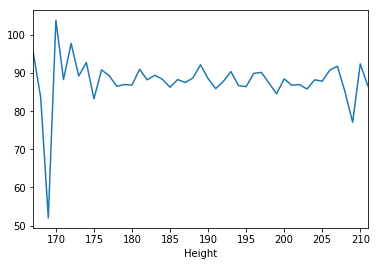

In [40]:
afl.groupby("Height")["Score"].mean().plot.line();

The trend line also indicated no specific relationship between height and score.

When fans are deciding which teams to support, or coaches/players are switching teams, they prefer to select teams with better players which could be determined by players with a higher average score. The average score per team was calculated and sorted and printed the 5 teams with the highest scores called score_by_team. Then this was plotted in a bar chart.

In [128]:
score_by_team = game_stats.groupby("Team",)["Score"].mean()
score_by_team = score_by_team.sort_values(ascending=False).head();
score_by_team

Team
Hawthorn           103.619883
Adelaide           101.233129
Geelong             96.225610
West Coast          95.493902
North Melbourne     94.327160
Name: Score, dtype: float64

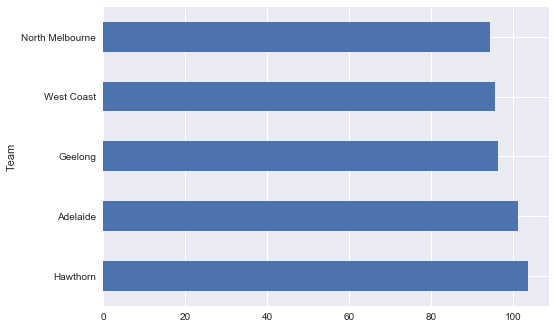

In [129]:
score_by_team.head().plot.barh();

In order to make sure that there were no players with the same name on multiple teams, I printed the score for each player in each team (grouped by both player and team). This was sorted by highest score and the players in a team with the highest scores were printed. This presented another aspect of the data that some players have played for multiple teams over different seasons. This could be further explore, for example to find which transfer was beneficial to the team or the player?

In [122]:
score_by_team_player = game_stats.groupby(["Player","Team"])["Score"].mean()
score_by_team_player.sort_values(ascending=False).head()

Player               Team    
Himmelberg, Elliott  Adelaide    165.000000
OBrien, Reilly       Adelaide    159.500000
Wanganeen, Derick    Hawthorn    139.000000
Murphy, Tom          Hawthorn    135.666667
Talia, Michael       Sydney      133.000000
Name: Score, dtype: float64

In [41]:
plt.style.use("seaborn-pastel")

I wanted to see if there was a relationship between the percent of the ganme played and average score. The scatter did not show this clearly, but the line graph showed the people of that played very little seem to have high scores which could be inflated because it is relative to the time tehy played. Players that played around 20 and 40 percent of the game had the maximum scores (two peaks).

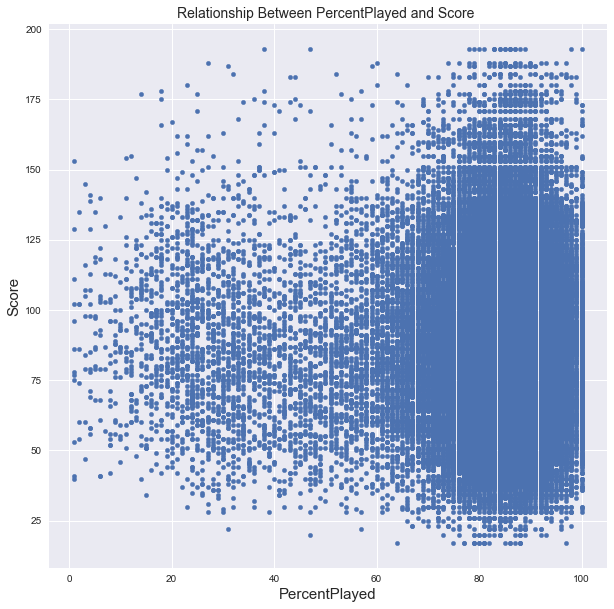

In [136]:
game_stats.plot.scatter(x="PercentPlayed", y="Score", figsize=(10, 10))
plt.title("Relationship Between PercentPlayed and Score ", size=14)
plt.xlabel("PercentPlayed", size=15)
plt.ylabel("Score", size=15);

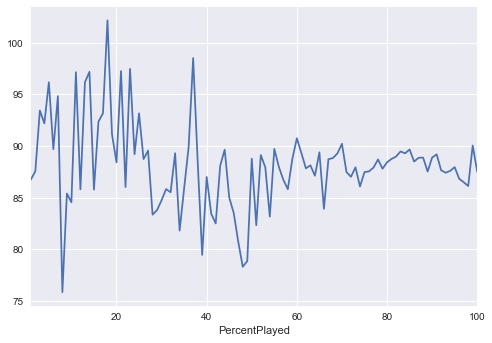

In [138]:
game_stats.groupby("PercentPlayed")["Score"].mean().plot.line();

Then I wanted to confirm my hypothesis that taller people tend to weigh more because of their muscle mass. So I graphed height and weight and it confirmed this hypothesis and showed a linear relationship.

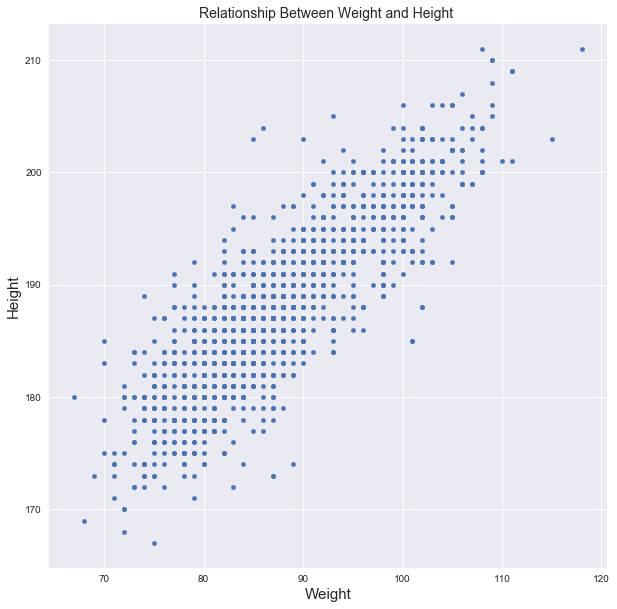

In [65]:
player_score_height.plot.scatter(x="Weight", y="Height", figsize=(10, 10))
plt.title("Relationship Between Weight and Height ", size=14)
plt.xlabel("Weight", size=15)
plt.ylabel("Height", size=15);

Following, I wanted to see which of the top teams were generally younger or older teams, this is important in football to predict their performance in the following year. Older teams tend to have many players retire and a shortlived success. Hawthorn seems to be slightly older than the rest of the teams.

In [51]:
plt.style.use("seaborn")

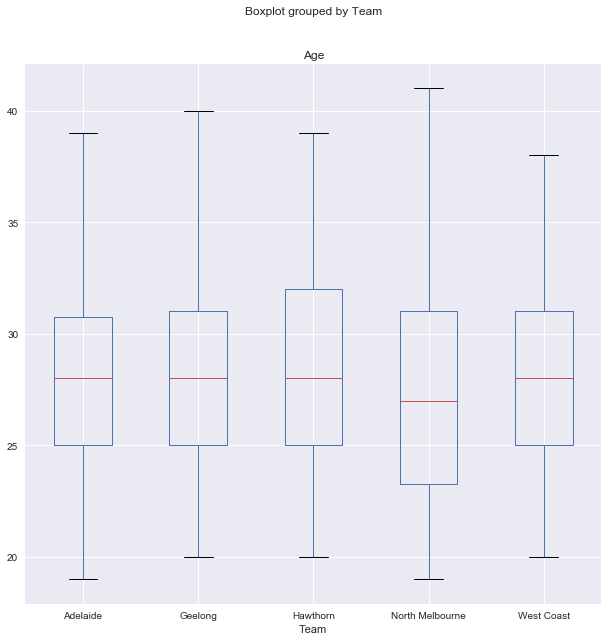

In [115]:
players_dropped[players_dropped.Team.isin(score_by_team.index)].boxplot(column="Age", by="Team", 
                                                                  figsize=(10,10));

In [ ]:
Finally, I wanted to which of the game statistics most heavily impacted the player's score. 

In [55]:
from ipywidgets import interact

In [139]:
numerical_columns = game_stats.select_dtypes([int, float]).columns.tolist()

In [143]:
numerical_columns.remove("Score")

In [146]:
@interact(col1=numerical_columns)
def dynamic_chart(col1):
    game_stats.groupby(col1)["Score"].mean().plot.line();
    plt.title("{} vs Score".format(col1))
    plt.xlabel(col1)
    plt.ylabel("Score");

interactive(children=(Dropdown(description='col1', options=('Age', 'Season', 'Margin', 'Disposals', 'Kicks', '…

The conclusion of my assignment that is confirmed by the dropdown menu of attributes is explored, we can see clearly that the number of goals, asssists, marks inside 50 seem to have the most linear and positive relationship with score. On the other hand, as the number of handballs increase the score should decrease however the graph does not exactly relay this information because the players that are better play more often, which exposes them to the possibility of a handball, thus not necissarily determining the score. Based on previous data, position, weight and height also influence the players score. Some teams also have a higher score average and older teams. 

Once a regression model is developed for the score, the factors that influence it with their coeffecients will be much more clear. This simply provides insight on possible influencers.